In [28]:
import video_processing as vp
from roipoly import RoiPoly 
import numpy
import matplotlib.pyplot as plt

### Define some static global variables

In [10]:
WIDTH = 256
HEIGHT = 256
TRUE_FRAMERATE = 28.815

In [20]:
l_mouse = "D:/2_mice/20180221/Experiment_5/MM803L_February-21_1512_experiment-5_MXXXR_wt_whisker_stim_lower.raw"
r_mouse = "D:/2_mice/20180221/Experiment_5/MMXXXR_February-21_1514_experiment-5_M804L_wt_whisker_stim_lower.raw"
l_mouse_timestamps_raw = "D:/2_mice/20180221/Experiment_5/MM803L_February-21_1512_experiment-5_MXXXR_wt_whisker_stim_lower_timestamps.raw"
r_mouse_timestamps_raw = "D:/2_mice/20180221/Experiment_5/MMXXXR_February-21_1514_experiment-5_M804L_wt_whisker_stim_lower_timestamps.raw" 
stim_frames_file = "D:/2_mice/20180221/Experiment_5/MMXXXR_February-21_1514_experiment-5_M804L_wt_whisker_stim_lower_stim_frames.txt"

### Extract the color channels from the RAW files

In [12]:
l_mouse_green_frames = vp.extract_RAW_frames(
    filename=l_mouse,
    channel='green',
    width=WIDTH,
    height=HEIGHT
)

r_mouse_green_frames = vp.extract_RAW_frames(
    filename=r_mouse,
    channel='green',
    width=WIDTH,
    height=HEIGHT
)

l_mouse_blue_frames = vp.extract_RAW_frames(
    filename=l_mouse,
    channel='blue',
    width=WIDTH,
    height=HEIGHT
)

r_mouse_blue_frames = vp.extract_RAW_frames(
    filename=r_mouse,
    channel='blue',
    width=WIDTH,
    height=HEIGHT
)

l_mouse_red_frames = vp.extract_RAW_frames(
    filename=l_mouse,
    channel='red',
    width=WIDTH,
    height=HEIGHT
)

r_mouse_red_frames = vp.extract_RAW_frames(
    filename=r_mouse,
    channel='red',
    width=WIDTH,
    height=HEIGHT
)

### Import RAW timestamps and clean the data

In [13]:
l_mouse_timestamps = vp.clean_raw_timestamps(l_mouse_timestamps_raw)
r_mouse_timestamps = vp.clean_raw_timestamps(r_mouse_timestamps_raw)

### Remove dark frames

In [14]:
# slice by threshold on green frames
l_mouse_slice = vp.DarkFramesSlice.threshold_method(l_mouse_green_frames)
r_mouse_slice = vp.DarkFramesSlice.threshold_method(r_mouse_green_frames)

# slice green frames
l_mouse_green_frames = l_mouse_green_frames[l_mouse_slice]
r_mouse_green_frames = r_mouse_green_frames[r_mouse_slice]

# slice blue frames
l_mouse_blue_frames = l_mouse_blue_frames[l_mouse_slice]
r_mouse_blue_frames = r_mouse_blue_frames[r_mouse_slice]

#slice red frames
l_mouse_red_frames = l_mouse_red_frames[l_mouse_slice]
r_mouse_red_frames = r_mouse_red_frames[r_mouse_slice]

# slice timestamps
l_mouse_timestamps = l_mouse_timestamps[l_mouse_slice]
r_mouse_timestamps = r_mouse_timestamps[r_mouse_slice]

### Find locations of any dropped frames

In [15]:
l_mouse_delta, l_mouse_where_dropped = vp.get_locations_of_dropped_frames(
    timestamps=l_mouse_timestamps,
    threshold=50_000
)

r_mouse_delta, r_mouse_where_dropped = vp.get_locations_of_dropped_frames(
    timestamps=r_mouse_timestamps,
    threshold=50_000
)

Mean filtered frame difference:  34703.83
Mean filtered frame difference:  34703.98


### Fill in dropped frames by interpolating available data

In [16]:
# ---------------------------- Green frames, left mouse ---------------------------#

# Create a list of DroppedFrames objects
list_of_dropped_frames_l_green = [
    vp.DroppedFrames(*args)
    for args in vp.generate_frames(
        l_mouse_green_frames,
        l_mouse_delta,
        l_mouse_where_dropped,
        TRUE_FRAMERATE,
    )
]

# Produce the interpolated frames
list_of_interpolated_dropped_frames_l_green = [
    DroppedFrames.interpolate()
    for DroppedFrames in list_of_dropped_frames_l_green
]

l_mouse_green_frames = vp.insert_interpolated_frames(
    l_mouse_green_frames,
    list_of_interpolated_dropped_frames_l_green,
)

# ---------------------------- Blue frames, left mouse ---------------------------#

# Create a list of DroppedFrames objects
list_of_dropped_frames_l_blue = [
    vp.DroppedFrames(*args)
    for args in vp.generate_frames(
        l_mouse_blue_frames,
        l_mouse_delta,
        l_mouse_where_dropped,
        TRUE_FRAMERATE,
    )
]

# Produce the interpolated frames
list_of_interpolated_dropped_frames_l_blue = [
    DroppedFrames.interpolate()
    for DroppedFrames in list_of_dropped_frames_l_blue
]

l_mouse_blue_frames = vp.insert_interpolated_frames(
    l_mouse_blue_frames,
    list_of_interpolated_dropped_frames_l_blue,
)

# ---------------------------- Red frames, left mouse ---------------------------#

# Create a list of DroppedFrames objects
list_of_dropped_frames_l_red = [
    vp.DroppedFrames(*args)
    for args in vp.generate_frames(
        l_mouse_red_frames,
        l_mouse_delta,
        l_mouse_where_dropped,
        TRUE_FRAMERATE,
    )
]

# Produce the interpolated frames
list_of_interpolated_dropped_frames_l_red = [
    DroppedFrames.interpolate()
    for DroppedFrames in list_of_dropped_frames_l_red
]

l_mouse_red_frames = vp.insert_interpolated_frames(
    l_mouse_red_frames,
    list_of_interpolated_dropped_frames_l_red,
)

In [17]:
# ---------------------------- Green frames, right mouse ----------------------------#

# Create a list of DroppedFrames objects
list_of_dropped_frames_r_green = [
    vp.DroppedFrames(*args)
    for args in vp.generate_frames(
        r_mouse_green_frames,
        r_mouse_delta,
        r_mouse_where_dropped,
        TRUE_FRAMERATE,
    )
]

# Produce the interpolated frames
list_of_interpolated_dropped_frames_r_green = [
    DroppedFrames.interpolate()
    for DroppedFrames in list_of_dropped_frames_r_green
]

r_mouse_green_frames = vp.insert_interpolated_frames(
    r_mouse_green_frames,
    list_of_interpolated_dropped_frames_r_green,
)

# ---------------------------- Blue frames, right mouse ----------------------------#

# Create a list of DroppedFrames objects
list_of_dropped_frames_r_blue = [
    vp.DroppedFrames(*args)
    for args in vp.generate_frames(
        r_mouse_blue_frames,
        r_mouse_delta,
        r_mouse_where_dropped,
        TRUE_FRAMERATE,
    )
]

# Produce the interpolated frames
list_of_interpolated_dropped_frames_r_blue = [
    DroppedFrames.interpolate()
    for DroppedFrames in list_of_dropped_frames_r_blue
]

r_mouse_blue_frames = vp.insert_interpolated_frames(
    r_mouse_blue_frames,
    list_of_interpolated_dropped_frames_r_blue,
)

# ---------------------------- Red frames, right mouse ----------------------------#

# Create a list of DroppedFrames objects
list_of_dropped_frames_r_red = [
    vp.DroppedFrames(*args)
    for args in vp.generate_frames(
        r_mouse_red_frames,
        r_mouse_delta,
        r_mouse_where_dropped,
        TRUE_FRAMERATE,
    )
]

# Produce the interpolated frames
list_of_interpolated_dropped_frames_r_red = [
    DroppedFrames.interpolate()
    for DroppedFrames in list_of_dropped_frames_r_red
]

r_mouse_red_frames = vp.insert_interpolated_frames(
    r_mouse_red_frames,
    list_of_interpolated_dropped_frames_r_red,
)


### Whisker Stimulation Averaging

In [23]:
# Not sure why we have this block is here
l_start_frame = l_mouse_slice.start
r_start_frame = r_mouse_slice.start

with open(stim_frames_file, 'r') as file:
    stim_frames = file.readlines()
    for i, _ in enumerate(stim_frames):
        stim_frames[i] = stim_frames[i].replace("\n", "")
        stim_frames[i] = int(stim_frames[i])-l_start_frame
    stim_frames = numpy.asarray(stim_frames)

In [24]:
for i, stim_frame in enumerate(stim_frames):
    last_adjusted_stim = None
    for (
        interpolated_dropped_frame_r_green
    ) in list_of_interpolated_dropped_frames_r_green:
        if (
            stim_frame
            > interpolated_dropped_frame_r_green.location
        ):
            stim_frames[
                i
            ] += (
                interpolated_dropped_frame_r_green.num_dropped_frames
            )
            last_adjusted_stim = stim_frame
# remove the stim_frames captured when the lights are off
stim_frames = stim_frames[
    numpy.where(
        stim_frames < l_mouse_green_frames.shape[0] - 100
    )
]

###  Calculate Fractional Change in Flourescence and Luminisence for Green and Red Frames

In [27]:
def calculate_df_f0_2(baseline_frames, frames):
    baseline = numpy.mean(baseline_frames, axis=0)
    frames = numpy.divide(
        numpy.subtract(frames, baseline), baseline
    )
    frames[numpy.where(numpy.isnan(frames))] = -1
    return frames


all_stim_frames = numpy.zeros(
    (stim_frames.shape[0], 200, 256, 256)
)
all_stim_frames_red = numpy.zeros(
    (stim_frames.shape[0], 200, 256, 256)
)
for i, stim_frame in enumerate(stim_frames[:-1]):
    baseline_frames = l_mouse_green_frames[
        stim_frame - 100 : stim_frame
    ]
    all_stim_frames[i] = calculate_df_f0_2(
        baseline_frames,
        l_mouse_green_frames[
            stim_frame - 100 : stim_frame + 100
        ],
    )

    baseline_frames_red = l_mouse_red_frames[
        stim_frame - 100 : stim_frame
    ]
    all_stim_frames_red[i] = calculate_df_f0_2(
        baseline_frames_red,
        l_mouse_red_frames[
            stim_frame - 100 : stim_frame + 100
        ],
    )


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


### Find the means of the green and red stim frames and save them

In [29]:
mean_stim_frames = numpy.mean(all_stim_frames, axis=0)
mean_stim_frames_red = numpy.mean(all_stim_frames_red, axis=0)
mean_stim_frames.tofile("mean_stim_frames.raw")
mean_stim_frames_red.tofile("mean_stim_frames_red.raw")
numpy.save("fixed_stim_frames.npy", stim_frames)

### Plot one of the green mean stim frames and draw a ROI

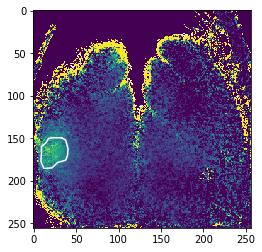

In [32]:
%matplotlib qt
plt.figure()
plt.imshow(mean_stim_frames[126], vmin=0, vmax=0.05)
stim_roi = RoiPoly(color='w')
%matplotlib inline
plt.imshow(mean_stim_frames[126], vmin=0, vmax=0.05)
stim_roi.display_roi()

### Get and plot the ROI mask

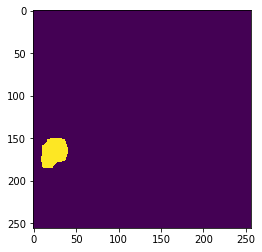

In [33]:
plt.figure()
stim_mask = stim_roi.get_mask(mean_stim_frames[125])
plt.imshow(stim_mask)

### Plot mean signal of lower whisker stimulation in ROI

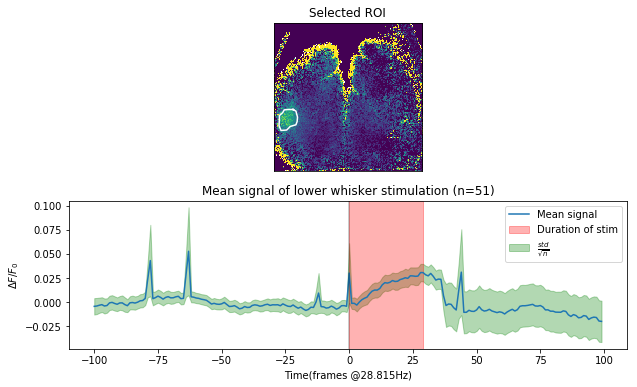

In [35]:
plt.figure(figsize=(10, 6))
mean_stim_signal = numpy.mean(
    mean_stim_frames[:, stim_mask], axis=1
)
all_stim_signals = numpy.mean(
    all_stim_frames[:, :, stim_mask], axis=2
)
std_stim_signal = numpy.std(
    all_stim_signals, axis=0
) / numpy.sqrt(all_stim_frames.shape[0])
time_stim = numpy.arange(-100, 100, 1)
plt.subplot(232)
plt.title("Selected ROI")
plt.imshow(mean_stim_frames[125], vmin=0, vmax=0.05)
plt.yticks([])
plt.xticks([])
stim_roi.display_roi()
plt.subplot(212)
plt.title(
    "Mean signal of lower whisker stimulation (n=%s)"
    % str(all_stim_signals.shape[0])
)
plt.plot(time_stim, mean_stim_signal, label="Mean signal")
plt.fill_between(
    time_stim,
    mean_stim_signal - std_stim_signal,
    mean_stim_signal + std_stim_signal,
    alpha=0.3,
    color="g",
    label=r"$\frac{std}{\sqrt{n}}$",
)
plt.ylabel(r"$\Delta F/F_0$")
plt.xlabel("Time(frames @28.815Hz)")
plt.axvline(0, color="k", linewidth=0.4)
plt.axvspan(
    0, 29, alpha=0.3, color="r", label="Duration of stim"
)
plt.legend()

### Plot lower whisker peak, upper whisker peak and the sum of the two

([], <a list of 0 Text xticklabel objects>)

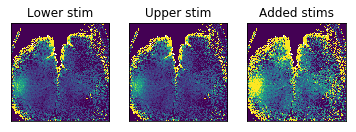

In [37]:
lower_whisker_peak = numpy.copy(mean_stim_frames[124])
upper_whisker_peak = numpy.copy(mean_stim_frames[124])
lower_whisker_peak[
    numpy.where(numpy.isnan(lower_whisker_peak))
] = -10
upper_whisker_peak[
    numpy.where(numpy.isnan(upper_whisker_peak))
] = -10
plt.figure()
plt.subplot(131)
plt.title("Lower stim")
plt.imshow((lower_whisker_peak), vmin=0, vmax=0.05)
plt.yticks([])
plt.xticks([])
plt.subplot(132)
plt.title("Upper stim")
plt.imshow((upper_whisker_peak), vmin=0, vmax=0.05)
plt.yticks([])
plt.xticks([])
plt.subplot(133)
plt.title("Added stims")
plt.imshow(
    (lower_whisker_peak + upper_whisker_peak),
    vmin=0,
    vmax=0.05,
    cmap="viridis",
)
plt.yticks([])
plt.xticks([])